Федоров Андрей
гр. 3530903/70302

**Вариант 37**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

inp = pd.read_pickle('var37.pkl')
data = pd.DataFrame.from_dict(inp)

- Посмотрим, что внутри

In [2]:
data.head(101)

,johes,mnpph,jqwbl
0,20.565759,18.915063,14.739504
1,7.198589,10.126912,17.439684
2,15.193666,6.379655,14.748393
3,13.824448,18.273135,15.582953
4,10.568769,14.126094,8.725377
...,...,...,...
95,11.169621,16.364825,7.596497
96,7.238231,10.665488,9.804834
97,9.415724,20.127502,13.510161
98,15.242451,14.168385,10.639290


- Найти среднее и дисперсию каждого столбца.

In [3]:
#Найдём среднее
data.mean()

johes    14.328425
mnpph    17.692891
jqwbl    14.154814
dtype: float64

In [4]:
#Найдём дисперсию
np.power(data.std(), 2)

johes    132.797205
mnpph    653.094370
jqwbl    720.446761
dtype: float64

- Визуализировать датасет любым удобным способом. Можно несколькими графиками.

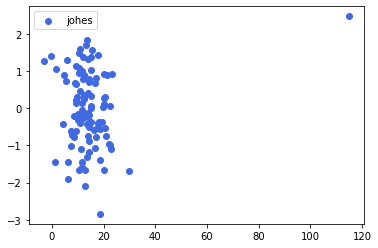

In [5]:
plt.scatter(data['johes'], np.random.randn(100), color = "royalblue", label = 'johes')
plt.legend()

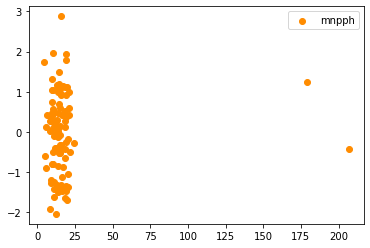

In [6]:
plt.scatter(data['mnpph'],np.random.randn(100), color = "darkorange", label = 'mnpph')
plt.legend()

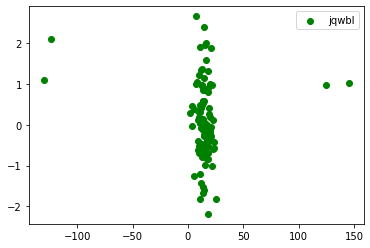

In [7]:
plt.scatter(data['jqwbl'],np.random.randn(100), color = "green", label = 'jqwbl')
plt.legend()

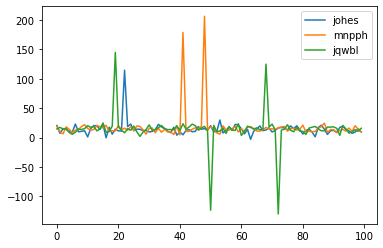

In [8]:
data.plot()

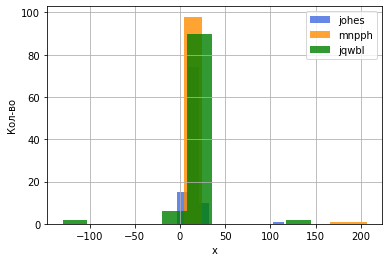

In [9]:
data['johes'].hist(color = "royalblue", alpha=0.8, label = 'johes')
data['mnpph'].hist(color = "darkorange", alpha=0.8, label = 'mnpph')
data['jqwbl'].hist(color = "green", alpha=0.8, label = 'jqwbl')
plt.xlabel('x')
plt.ylabel('Кол-во')
plt.legend();

- Построить графики для каждой пары признаков в наборе данных.

1) johes + mnpph

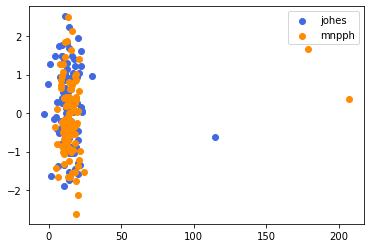

In [10]:
plt.scatter(data['johes'], np.random.randn(100), color = "royalblue", label = 'johes')
plt.scatter(data['mnpph'],np.random.randn(100), color = "darkorange", label = 'mnpph')
plt.legend();

2) johes + jqwbl

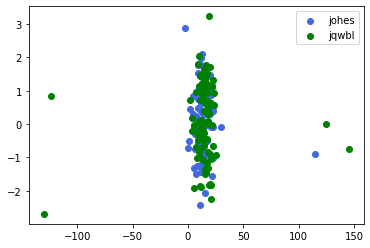

In [11]:
plt.scatter(data['johes'], np.random.randn(100), color = "royalblue", label = 'johes')
plt.scatter(data['jqwbl'],np.random.randn(100), color = "green", label = 'jqwbl')
plt.legend();

3) mnpph + jqwbl

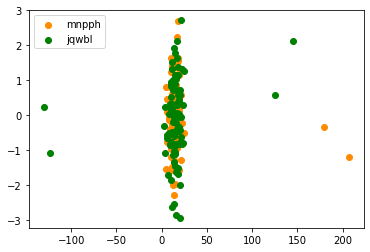

In [12]:
plt.scatter(data['mnpph'],np.random.randn(100), color = "darkorange", label = 'mnpph')
plt.scatter(data['jqwbl'],np.random.randn(100), color = "green", label = 'jqwbl')
plt.legend();

- Построить гистограмму каждого из признаков.

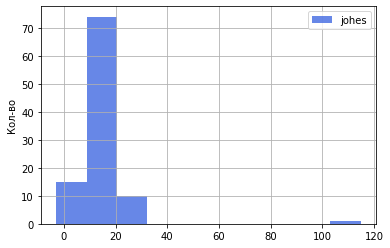

In [13]:
data['johes'].hist(color = "royalblue", alpha=0.8, label = 'johes')
plt.ylabel('Кол-во')
plt.legend();

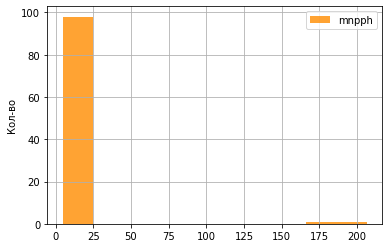

In [14]:
data['mnpph'].hist(color = "darkorange", alpha=0.8, label = 'mnpph')
plt.ylabel('Кол-во')
plt.legend();

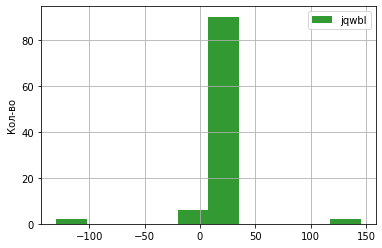

In [15]:
data['jqwbl'].hist(color = "green", alpha=0.8, label = 'jqwbl')
plt.ylabel('Кол-во')
plt.legend();

- Найти выбросы. Удалить их.
(номер варианта 37, присваиваем среднее значение выбросам)

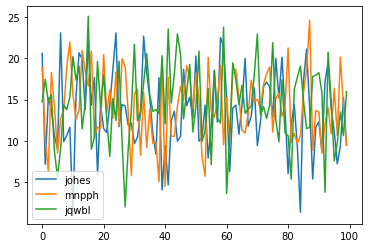

In [16]:
new_data = data.copy()

# квартильные рассчёты
q1 = new_data.quantile(.25) # первый (нижний) квартиль
q3 = new_data.quantile(.75) # третий (верхний) квартиль
iqr = (q3 - q1) * 1.5 # межквартильный диапазон

high_line = q3 + iqr # верхние границы
low_line = q1 - iqr # нижние границы

for col in new_data.columns:
    col_data = new_data[col]
    for i in range(len(col_data)):
        if col_data[i] > high_line[col]:
            col_data[i]  = data[col].mean()
        elif col_data[i]  < low_line[col]:
            col_data[i]  = data[col].mean()
    new_data[col] = col_data
        

new_data.plot()

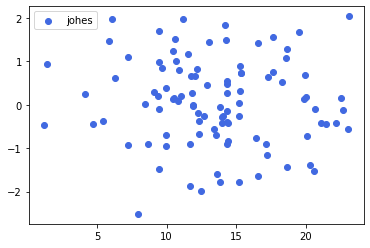

In [17]:
plt.scatter(new_data['johes'], np.random.randn(100), color = "royalblue", label = 'johes')
plt.legend()

- Найти новые средние и дисперсии, сравнить со старыми.

Старые средние:

In [18]:
data.mean()

johes    14.328425
mnpph    17.692891
jqwbl    14.154814
dtype: float64

Новые средние:

In [19]:
new_data.mean()

johes    13.488666
mnpph    14.190472
jqwbl    14.554194
dtype: float64

Старые дисперсии:

In [20]:
np.power(data.std(), 2)

johes    132.797205
mnpph    653.094370
jqwbl    720.446761
dtype: float64

Новые дисперсии:

In [21]:
np.power(new_data.std(), 2)

johes    22.572045
mnpph    17.310571
jqwbl    21.294988
dtype: float64

- Нормализовать данные по среднему и дисперсии.

In [22]:
norm_data = (data - data.mean()) / data.std()
print(norm_data)

       johes     mnpph     jqwbl
0   0.541258  0.047824  0.021783
1  -0.618707 -0.296058  0.122382
2   0.075083 -0.442689  0.022115
3  -0.043734  0.022705  0.053207
4  -0.326252 -0.139569 -0.202280
..       ...       ...       ...
95 -0.274112 -0.051967 -0.244338
96 -0.615267 -0.274984 -0.162064
97 -0.426310  0.095267 -0.024017
98  0.079317 -0.137915 -0.130975
99 -0.420914 -0.319466  0.066677

[100 rows x 3 columns]


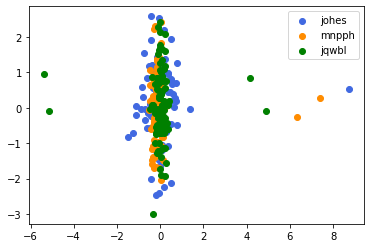

In [23]:
plt.scatter(norm_data['johes'], np.random.randn(100), color = "royalblue", label = 'johes')
plt.scatter(norm_data['mnpph'], np.random.randn(100), color = "darkorange", label = 'mnpph')
plt.scatter(norm_data['jqwbl'], np.random.randn(100), color = "green", label = 'jqwbl')
plt.legend();